# Mapping Crime in Vancouver

In [1]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv
from matplotlib import pyplot

##################
# Data Definitions

CrimeData = NamedTuple('CrimeData', [('x', float),
                                     ('y', float)])
# interp. data about a single crime in Vancouver with its x and y location.
# (Locations are in metres offset from a somewhat arbitrary point on the surface of
# the earth. (Caution: locations of (0, 0) are sometimes placeholders
# or intentionally inaccurate reports. Fortunately, that doesn't occur in the 
# subset of the data we're looking at.)
CD1 = CrimeData(0, 0)
CD2 = CrimeData(-3.5, 2.0)
CD3 = CrimeData(490258.683, 5458154.503)  # sample location actually pulled from our data

# template based on compound (2 fields) and reference rule (once)
@typecheck
def fn_for_crime_data(cd: CrimeData) -> ...:
    return ...(cd.x,
               cd.y)
    

# List[CrimeData]
# interp. a list of crime data
LOCD0 = []
LOCD1 = [CD1, CD2]

# template based on arbitrary-sized data and reference rule
@typecheck
def fn_for_locd(locd: List[CrimeData]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for cd in locd:
        acc = ...(fn_for_crime_data(cd), acc)
        
    return ...(acc)


# List[float]
# interp. a list of floats
LOF0 = []
LOF1 = [0, -3.5]

# template based on arbitrary-sized data
@typecheck
def fn_for_lof(lof: List[float]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for f in lof:
        acc = ...(f, acc)
        
    return ...(acc)

In [2]:
@typecheck
def read(filename: str) -> List[CrimeData]:
    """    
    reads information from the specified file and returns a list of crime data
    
    the file must be in the VPD crime format, and the x and y entries must be valid 
    floats.
    """
    # Note: in future, we might want to skip (0, 0) entries, but we won't now.
    
    #return []  #stub
    # Template from HtDAP

    # locd contains the result so far
    locd = [] # type: List[CrimeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            cd = CrimeData(parse_float(row[8]), parse_float(row[9]))
            locd.append(cd)
    
    return locd



start_testing()
expect(read("testfile_empty.csv"), []) 
expect(read("testfile_small.csv"), [CrimeData(0, 0),
                                    CrimeData(-3.5, 2.0)]) 

summary()


2 of 2 tests passed


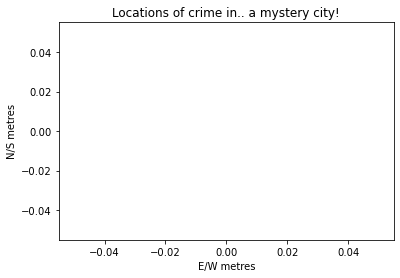

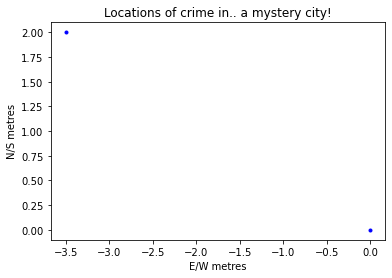

2 of 2 tests passed


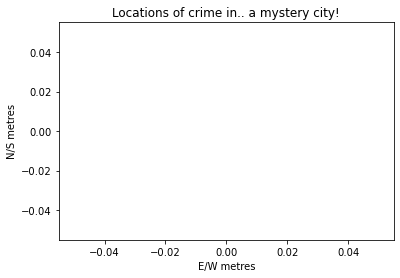

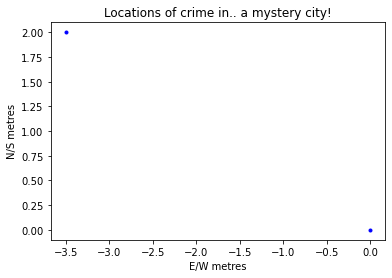

2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed


In [3]:
@typecheck
def main(filename: str) -> None:
    """
    Reads the crime data from given filename and plots its locations.
    There's no computation here; so, this wouldn't be enough for a project.
    (But if we also plotted the average location, maybe with a really big star,
    that averaging computation would be enough!)
    """
    # We might want to rename main, but I left it as is just to emphasize that
    # that is OK here as well. Our file should have a good name, however!
    
    #return None #stub
    # Template from HtDAP, based on function composition 
    return analyze(read(filename))     


@typecheck
def analyze(locd: List[CrimeData]) -> None: 
    """ 
    Plots the locations in locd.
    """ 
    #return None  #stub
    # Template from viz
    
    x_values = get_x_locations(locd)
    y_values = get_y_locations(locd)

    # set the labels for the axes
    pyplot.xlabel('E/W metres')
    pyplot.ylabel('N/S metres')
    pyplot.title('Locations of crime in.. a mystery city!')

    # create the scatterplot, with markers that are 
    # blue (c='b') and little dots (marker='.')
    pyplot.scatter(x_values,y_values,marker='.', c='b')

    # show the plot
    pyplot.show()  
    
    return None

@typecheck
def get_x_locations(locd: List[CrimeData]) -> List[float]:
    """
    return the x locations from locd
    """
    #return []  #stub
    # template from List[CrimeData]
    
    # acc is the result so far
    acc = [] # type: List[float]
    
    for cd in locd:
        acc.append(cd.x)
        
    return acc

@typecheck
def get_y_locations(locd: List[CrimeData]) -> List[float]:
    """
    return the y locations from locd
    """
    #return []  #stub
    # template from List[CrimeData]
    
    # acc is the result so far
    acc = [] # type: List[float]
    
    for cd in locd:
        acc.append(cd.y)
        
    return acc

start_testing()
# Should produce an empty plot with: title "Locations of crime in.. a mystery city!",
# x and y axis labels showing east/west metres and north/south metres (respectively).
expect(main("testfile_empty.csv"), None) 

# Should produce a similar plot except with a point at (0,0) and another at (-3.5, 2).
# Points should be blue dots. (On an exam I'd totally sketch this, but in Jupyter this
# one is short enough to describe that typing this out is faster!)
expect(main("testfile_small.csv"), None)
summary()

start_testing()
# See above (main) for descriptions of what these should produce.
expect(analyze([]), None) 
expect(analyze([CrimeData(0, 0), CrimeData(-3.5, 2.0)]), None)
summary()

start_testing()
expect(get_x_locations([]), []) 
expect(get_x_locations([CrimeData(0, 0), CrimeData(-3.5, 2.0)]), [0, -3.5])
summary()

start_testing()
expect(get_y_locations([]), []) 
expect(get_y_locations([CrimeData(0, 0), CrimeData(-3.5, 2.0)]), [0, 2.0])
summary()

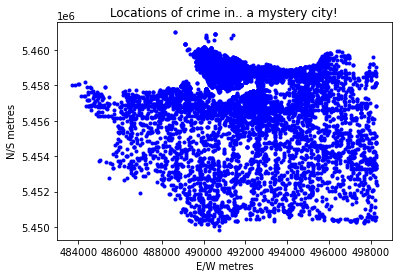

In [4]:
# Here is our overall average location!
main("crimedata_2018.csv")

Whoa now, what city is that? Check out [the formal boundaries of this city](https://www.google.ca/maps/place/Vancouver,+BC/@49.2578263,-123.193944,12z/data=!3m1!4b1!4m5!3m4!1s0x548673f143a94fb3:0xbb9196ea9b81f38b!8m2!3d49.2827291!4d-123.1207375).
